SANE Seydou
                                                                                                             

# Prediction part

In [318]:
import pandas as pd
from pandas import DataFrame
import urllib.request
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vQVtdpXMHB4g9h75a0jw8CsrqSuQmP5eMIB2adpKR5hkRggwMwzFy5kB-AIThodhVHNLxlZYm8fuoWj/pub?gid=2105854808&single=true&output=csv'
data= urllib.request.urlopen(url)
velo = pd.read_csv(data)
velo

,Date,Heure / Time,Vélos depuis le 1er janvier / Grand total,Vélos ce jour / Today's total,Unnamed: 4,Remarque
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,12/03/2020,11:05:00,109.0,109.0,NaN,NaN
3,12/03/2020,14:30:00,441.0,441.0,NaN,NaN
4,13/03/2020,10:02:00,1921.0,385.0,NaN,NaN
...,...,...,...,...,...,...
1499,31/03/2021,15:04:00,109811.0,1044.0,NaN,NaN
1500,31/03/2021,16:27:00,109971.0,1204.0,NaN,NaN
1501,31/03/2021,17:00:00,110050.0,1283.0,NaN,NaN
1502,31/03/2021,17:13:00,110092.0,1325.0,NaN,NaN


In [319]:
##Vérification du nombre de données manquantes par colonnes
velo.isnull().sum()

Date                                            2
Heure / Time                                    4
Vélos depuis le 1er janvier / Grand total       2
Vélos ce jour / Today's total                   2
Unnamed: 4                                   1504
Remarque                                     1503
dtype: int64

In [320]:
##Suppression des colonnes avec plus de 50% de données manquantes
column_with_nan = velo.columns[velo.isnull().any()]
for column in column_with_nan:
          if velo[column].isnull().sum()*100.0/velo.shape[0] > 50:
                velo.drop(column,1, inplace=True)
velo

,Date,Heure / Time,Vélos depuis le 1er janvier / Grand total,Vélos ce jour / Today's total
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,12/03/2020,11:05:00,109.0,109.0
3,12/03/2020,14:30:00,441.0,441.0
4,13/03/2020,10:02:00,1921.0,385.0
...,...,...,...,...
1499,31/03/2021,15:04:00,109811.0,1044.0
1500,31/03/2021,16:27:00,109971.0,1204.0
1501,31/03/2021,17:00:00,110050.0,1283.0
1502,31/03/2021,17:13:00,110092.0,1325.0


In [321]:
##Suppression des lignes avec des données manquantes
index_with_nan = velo.index[velo.isnull().any(axis=1)]
velo.drop(index_with_nan,0, inplace=True)
velo

,Date,Heure / Time,Vélos depuis le 1er janvier / Grand total,Vélos ce jour / Today's total
2,12/03/2020,11:05:00,109.0,109.0
3,12/03/2020,14:30:00,441.0,441.0
4,13/03/2020,10:02:00,1921.0,385.0
5,13/03/2020,14:15:00,2305.0,769.0
6,13/03/2020,18:21:00,2822.0,1286.0
...,...,...,...,...
1499,31/03/2021,15:04:00,109811.0,1044.0
1500,31/03/2021,16:27:00,109971.0,1204.0
1501,31/03/2021,17:00:00,110050.0,1283.0
1502,31/03/2021,17:13:00,110092.0,1325.0


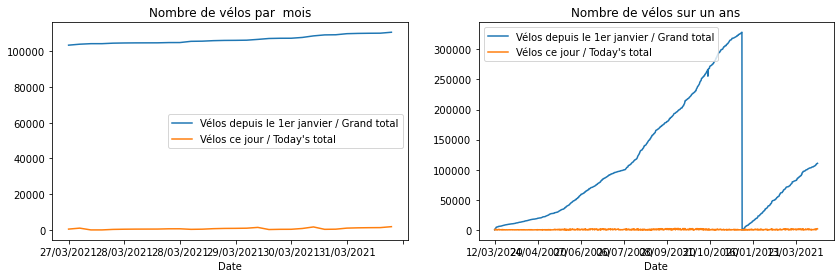

In [323]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
velo.iloc[-30:].set_index('Date').plot(ax=ax[0])
velo.set_index('Date').plot(ax=ax[1])
ax[0].set_title("Nombre de vélos par  mois")
ax[1].set_title("Nombre de vélos sur un ans");

In [324]:
from statsmodels.tsa.tsatools import lagmat
lag = 8
X = lagmat(velo["Vélos ce jour / Today's total"], lag)
lagged = velo.copy()
for c in range(1,lag+1):
    lagged["lag%d" % c] = X[:, c-1]
lagged.tail()

,Date,Heure / Time,Vélos depuis le 1er janvier / Grand total,Vélos ce jour / Today's total,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8
1499,31/03/2021,15:04:00,109811.0,1044.0,444.0,364.0,1703.0,835.0,390.0,371.0,249.0,1440.0
1500,31/03/2021,16:27:00,109971.0,1204.0,1044.0,444.0,364.0,1703.0,835.0,390.0,371.0,249.0
1501,31/03/2021,17:00:00,110050.0,1283.0,1204.0,1044.0,444.0,364.0,1703.0,835.0,390.0,371.0
1502,31/03/2021,17:13:00,110092.0,1325.0,1283.0,1204.0,1044.0,444.0,364.0,1703.0,835.0,390.0
1503,31/03/2021,20:12:00,110619.0,1852.0,1325.0,1283.0,1204.0,1044.0,444.0,364.0,1703.0,835.0


In [325]:
X = lagged.drop(["Date", "Heure / Time", "Vélos depuis le 1er janvier / Grand total"], axis=1)
Y = lagged["Vélos ce jour / Today's total"]
X.shape, Y.shape

((1500, 9), (1500,))

In [326]:
from numpy import corrcoef
corrcoef(X)

array([[ 1.        ,  0.96944396,  0.58763422, ...,  0.33243846,
         0.29132635,  0.5421864 ],
       [ 0.96944396,  1.        ,  0.7620779 , ...,  0.39980061,
         0.35529038,  0.58029904],
       [ 0.58763422,  0.7620779 ,  1.        , ...,  0.49096452,
         0.45978428,  0.53834014],
       ...,
       [ 0.33243846,  0.39980061,  0.49096452, ...,  1.        ,
         0.1858927 , -0.13703685],
       [ 0.29132635,  0.35529038,  0.45978428, ...,  0.1858927 ,
         1.        ,  0.18059595],
       [ 0.5421864 ,  0.58029904,  0.53834014, ..., -0.13703685,
         0.18059595,  1.        ]])

In [327]:
from sklearn.linear_model import LinearRegression
clr = LinearRegression()
clr.fit(X, Y)

LinearRegression()

In [328]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [329]:
from sklearn.metrics import r2_score
r2_score(Y, clr.predict(X))

1.0

In [330]:
clr.coef_

array([ 1.00000000e+00, -2.55310522e-16, -1.65380545e-16, -1.21854542e-16,
        5.75161083e-17,  6.74651336e-17, -2.16208613e-17, -3.65001460e-17,
        6.80208161e-17])

In [331]:
for i in range(1, X.shape[1]):
    print("X(t-%d)" % (i), r2_score(Y, X.iloc[:, i]))

X(t-1) 0.18971090425340575
X(t-2) -0.24175429738732457
X(t-3) -0.34792479402031784
X(t-4) -0.4007448917704377
X(t-5) -0.40618440800176203
X(t-6) -0.4442813114323738
X(t-7) -0.45182427809102754
X(t-8) -0.42741509761083196


# Partie visualisation

In [332]:
import pandas as pd
from pandas import DataFrame
import json
import urllib.request
import urllib.parse as par
url1='https://data.montpellier3m.fr/sites/default/files/ressources/MMM_EcoCompt_X2H20042633.json'
data1= urllib.request.urlopen(url1)
velo1=pd.read_json(data1)
velo1


,intensity,laneId,dateObserved,location,id,type,vehicleType,reversedLane
coordinates,849,734202564,2021-03-30T00:00:00/2021-03-31T00:00:00,"[3.8336, 43.61465]",MMM_EcoCompt_X2H20042633_202103300000,TrafficFlowObserved,bicycle,False
type,849,734202564,2021-03-30T00:00:00/2021-03-31T00:00:00,Point,MMM_EcoCompt_X2H20042633_202103300000,TrafficFlowObserved,bicycle,False


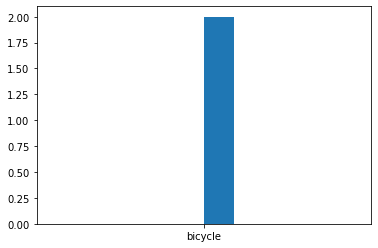

In [333]:
import matplotlib.pyplot as plt
plt.hist(velo1["vehicleType"])
plt.show()